<a href="https://colab.research.google.com/github/sakhum/Trading_bot/blob/main/Trading_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3-3433972175.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


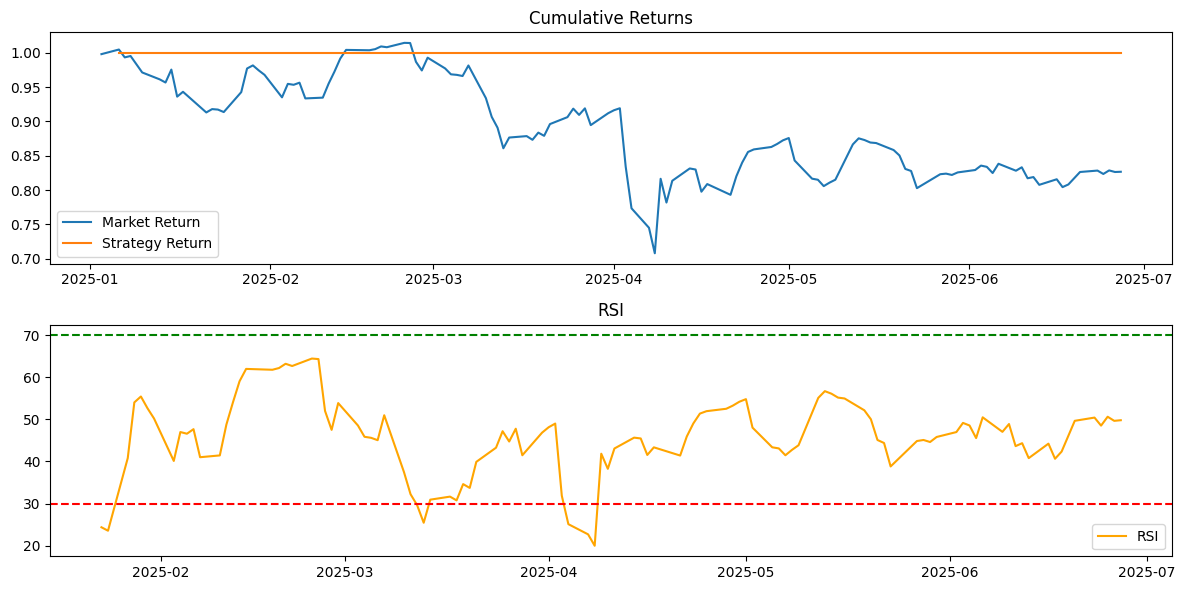

In [3]:
import ta
import logging
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set up logging
logging.basicConfig(filename='trading_bot.log', level=logging.INFO, format='%(asctime)s - %(message)s')
logging.info('Starting trading bot')

# Define the stock symbol and date range
stock_symbol = 'AAPL'
start_date = '2025-01-01'
end_date = '2025-06-30'

# Fetch the stock data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
stock_data.columns = stock_data.columns.get_level_values(0)
logging.info(f'Fetched data for {stock_symbol} from {start_date} to {end_date}')

# Calculate moving averages
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA_200'] = stock_data['Close'].rolling(window=200).mean()

# Calculate RSI
stock_data['RSI'] = ta.momentum.RSIIndicator(stock_data['Close'], window=14).rsi()

# Generate signals
stock_data['Signal'] = 0
stock_data.iloc[50:, stock_data.columns.get_loc('Signal')] = np.where(stock_data['SMA_50'][50:] > stock_data['SMA_200'][50:], 1, 0)
stock_data['Position'] = stock_data['Signal'].diff()

# Calculate returns
stock_data['Market Return'] = stock_data['Close'].pct_change()
stock_data['Strategy Return'] = stock_data['Market Return'] * stock_data['Position'].shift(1)

# Log trades
trades = stock_data[stock_data['Position'] != 0]
for date, row in trades.iterrows():
    action = 'Buy' if row['Position'] == 1 else 'Sell'
    logging.info(f'{date}: {action} at {row["Close"]}')

# Calculate cumulative returns
stock_data['Cumulative Market Return'] = (1 + stock_data['Market Return']).cumprod()
stock_data['Cumulative Strategy Return'] = (1 + stock_data['Strategy Return']).cumprod()

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(stock_data['Cumulative Market Return'], label='Market Return')
plt.plot(stock_data['Cumulative Strategy Return'], label='Strategy Return')
plt.legend()
plt.title('Cumulative Returns')

plt.subplot(2, 1, 2)
plt.plot(stock_data['RSI'], label='RSI', color='orange')
plt.axhline(30, color='red', linestyle='--')
plt.axhline(70, color='green', linestyle='--')
plt.legend()
plt.title('RSI')
plt.tight_layout()
plt.show()

In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install yfinance
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=379aec5f66823cac2c59a53081cf4419a02400cf4360ba262c40c3bb0f7dcc57
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [2]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=a0669de3d1e34dcb1b008511a473c765093d70b853071821405b44abedae4e13
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta
